In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
print('helloooou')

helloooou


LOL!
[0, -1, -2, -1, 0, 1, 2, 3, 3, 3, 4, 5, 5, 4, 4, 4, 5, 6, 6, 5, 4, 5, 6, 6, 6, 5, 5, 4, 5, 6, 5, 6, 7, 7, 7, 6, 7, 6, 7, 6, 7, 6, 5, 6, 7, 6, 6, 7, 7, 6, 5, 5, 5, 4, 3, 3, 4, 4, 4, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 4, 4, 5, 4, 3, 3, 2, 2, 3, 4, 5, 6, 7, 7, 8, 9, 8, 7, 7, 7, 8, 8, 9, 10, 11, 12, 11, 12, 11, 11, 11, 11, 10, 10, 9, 9, 9, 10, 11, 10, 9, 8, 8, 8, 7, 7, 7, 7, 8, 9, 10, 9, 10, 9, 10, 10, 11, 12, 12, 11, 11, 11, 12, 12, 11, 12, 11, 12, 12, 13, 12, 11, 10, 9, 10, 11, 10, 11, 11, 12, 13, 12, 12, 11, 12, 11, 12, 13, 14, 13, 14, 14, 14, 13, 12, 11, 11, 11, 12, 13, 14, 15, 14, 14, 14, 13, 14, 15, 16, 17, 18, 19, 20, 20, 19, 18, 18, 19, 19, 18, 18, 18, 18, 17, 16, 15, 16, 16, 16, 15, 14, 14, 15, 15, 16, 16, 17, 18, 19, 19, 20, 21, 20, 21, 22, 21, 21, 20, 21, 22, 22, 21, 21, 22, 21, 20, 20, 19, 20, 21, 21, 20, 20, 21, 20, 21, 20, 21, 21, 20, 21, 21, 20, 21, 22, 21, 21, 22, 23, 23, 22, 21, 21, 21, 21, 20, 21, 21, 20, 19, 18, 18, 18, 18,

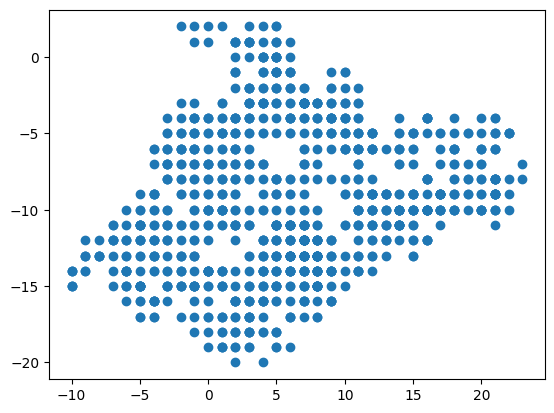

In [2]:

print('LOL!')
tau = 1000
X = []
Y = []
t_a = 0
t_b = 0

for t in range(0, tau):
    t_a += random.randint(-1, 1)
    t_b += random.randint(-1, 1)
    X.append(t_a)
    Y.append(t_b)

print(X)
print(Y)
plt.scatter(X,Y)
plt.show()